# **The Measures of Variability**

The measures of variability in plain words, simply helps us to see how much the data is varied or dispersed among themselves. There are three main measures of variability. 

### **Range:**

- Range measures how far the data points are in a distribution
- The formula would just be the highest value minus the lowest value
- There is the inclusive range and exclusive range where the exclusive range is the formula mentioned above
- The inclusive range includes another minus one in the formula
- Boxplot is one great visualization to determine the range of the data values

### **Standard Deviation:**

- The standard deviation is the average measure of deviation of data points from the mean value.
- Like the mean, it is also sensitive to extreme values.
- The formula involves:
      Std = square root{ (X-Mean)2/n-1}
- Here the n is subtracted by 1 to accomodate for any error in the estimated standard deviation
- There also exists the absolute standard deviation where instead of taking sqaures, we just take the absolute values and find their average
- The more the size of the sample is closer to the size of the population the more representative it (descriptive statistic measures) become

### **Variance:**

- It is quite similiar the standard deviation.
- However, the square root in the formula is eliminated by squaring the standard deviation.
- Variance differs with standard deviation by the type of unit and also it gives more weight to big deviations and lesser weights to smaller deviations.
- Example: 4x4 = 16 and 0.5x0.5 will be 0.25
- So we can use this measure where we need to give more sensitivity to larger deviations.
- It can also be useful for other mathematical calculations

In [3]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#Importing the dataset

colnames = ['uid','gpa_all','gpa_13s','cs_65']
grades = pd.read_csv("C:/Users/Nandhika/Documents/GitHub_Projects_Statistics/data/dataset/education/grades.csv",names=colnames,skiprows=1)

#Displaying the first 5 observations from the dataset

grades.head()

,uid,gpa_all,gpa_13s,cs_65
0,u01,2.863,1.777778,3.0
1,u02,3.505,4.000000,4.0
2,u04,3.029,3.500000,4.0
3,u05,3.679,3.777778,4.0
4,u07,3.474,4.000000,4.0


**Feature Explanation:**

- The 'uid' refers to the student's id, here
- The 'gpa_all' corresponds to the Cummulative GPA
- The 'gpa_13s' refers to the GPA of the spring term 2013.
- The 'cs_65' has the GPA of that particular subject

In [26]:
def rang(df):
    return df.max() - df.min()

- There are no in-built python functions to calculate the range of columns in a dataframe. Hence I am using an user-defined fucntion called "rang" here.

In [30]:
#Calculating the measures of variability for all the features

data = {
    'GPA_ALL': [ rang(grades['gpa_all']), grades['gpa_all'].std(), grades['gpa_all'].var()],
    'GPA_SPRING_13': [ rang(grades['gpa_13s']), grades['gpa_13s'].std(), grades['gpa_13s'].var()],
    'GPA_CS65': [rang(grades['cs_65']), grades['cs_65'].std(), grades['cs_65'].var()]
}

grades_mc = pd.DataFrame(data, index=['Range', 'Standard_deviation','Variance'])
grades_mc

,GPA_ALL,GPA_SPRING_13,GPA_CS65
Range,1.547000,3.000000,3.000000
Standard_deviation,0.397754,0.798284,0.646140
Variance,0.158208,0.637258,0.417497


**Range**

- A small value of range can indicate that there is not much difference between the highest value and the lowest value like in the gpa_all column
- We can see that the range in the cs65 column is exactly the highest value of the column. This indicates that there might be a null value 'zero value'. We mutate the value by putting an average value of mean based on the column, because we know that the GPA cannot be Zero. However, this value can be a bit over-estimated comparing the other GPA values of that particular student.

**Standard Deviation**

- The gpa_all column has the least difference which means most of their values are the same
- The high std is other two columns can be signs of outliers as std is sensitive to outliers.

**Variance**

- The first column has smaller variance that the standard deviation proving the statement that "it gives more weight to big deviations and lesser weights to smaller deviations."


## **Using  seaborn plots to visualize variability:**


In [31]:
#Dropping the id column 
grades_box = grades.drop(columns=['uid'])
#Using melt fucntion to change the data into long-form
grades_melted = grades_box.melt(var_name="Different GPAs",value_name='Values')

### **Boxplot:**

- The middle line in the plot represents the median score.
- The starting of the box is the 25 th percentile and the ending corner is the 75th percentile
- The area inside the box is the interquartile range
- The lower end of the boxplot is the minimum value and the other end represents the maximum value
- The dots represents the outliers

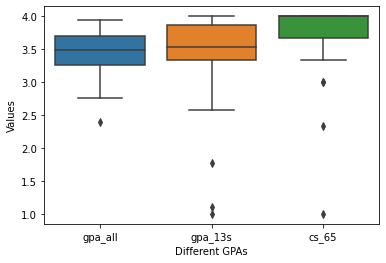

In [33]:
#Boxplot
sns.boxplot(x="Different GPAs",y="Values",data = grades_melted)
plt.show()

- We can see that the cs_65 column's box does not have a middle line. This is because the median value here is itself the maximum value
- We can observe that there are more extreme outliers in the 13s and cs65 columns, leading to a higher value of deviation than the all gpa column

### **Violinplot:**

- The middle white star in the plot represents the median score.
- The area inside the gray box is the interquartile range
- The lower end of the gray box is the minimum value and the other end represents the maximum value and the rest of the distribution.
- The waves around it actually represents a KDE plot
- It shows where the values are dense (populated) and where they are not.

<AxesSubplot:xlabel='Different GPAs', ylabel='Values'>

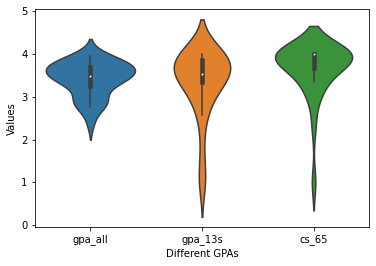

In [34]:
#Violinplot
sns.violinplot(x="Different GPAs",y="Values",data = grades_melted)

- We can see that near the outliers the violin plot is very much thinner representing the fact that very less number of observations possess that particular value.

### **Swarmplot:**

- This can be thought of a categorical scatterplot
- It shows the distribution of each data point over different variables without overlapping
- If the columns are similar in distribution we can easily interpret it using this plot

<AxesSubplot:xlabel='Different GPAs', ylabel='Values'>

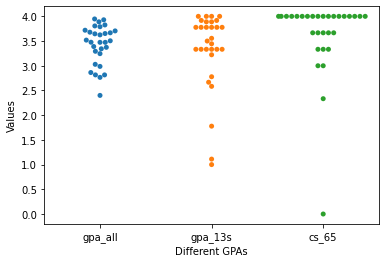

In [22]:
sns.swarmplot(x="Different GPAs",y="Values",data = grades_melted)

- Here we can see that all columns have varied distribtuions

### **Pointplot:**

- The middle point in the line  represents the mean score.
- It can be changed to median score using the estimator argument
- The line above and below the point represents the **95% confidence interval** which means that given that the data is a random sample from a population, then we can be 95% confident that the mean of the population lies between the CI value.
- Now we can use the error_bar argument to show the standard deviation which otherwise would imply the mean.

<AxesSubplot:xlabel='Different GPAs', ylabel='Values'>

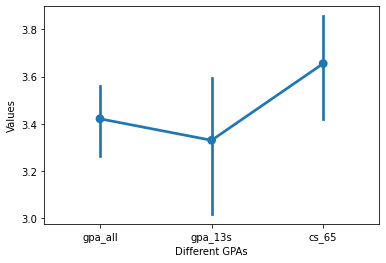

In [45]:
sns.pointplot(x="Different GPAs",y="Values",data = grades_melted,error_bar="sd")

- We can see the same trend that the standard deviation is the highest for the middle feature, followed by the cs_65 and the gpa_all


### **Barplot:**

- Like a common barplot, by specifying the confidence interval to standard deviation, we can infer the variability.

<AxesSubplot:xlabel='Different GPAs', ylabel='Values'>

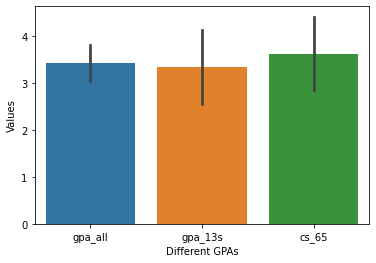

In [24]:
sns.barplot(x="Different GPAs",y="Values",data = grades_melted, ci="sd")

This would be the end of Part -3 in Sadly Statistics. I am admitting that I am humbly learning statistics and may I request you to pardon me if there are any mistakes. I also really look forward to you, if you would be able to point out and correct my errors!